# Визуализация данных с помощью Seaborn

Цель задания - исследование датасета dataset_file_storage.csv и визуализация данных с помощью Seaborn.

Для каждой задачи необходимо:

- Построить график-гистограмму (размер графика должен быть достаточным для визуального анализа).

- Подписать оси и заголовок.

- Ответить на поставленные вопросы.
___________

- Код должен выполняться при условии наличия датасета в каталоге со скриптом или указанием пути к датасету (падение кода с ошибкой у проверяющего на python аналогичной версии - повод не зачесть все пункты соответствующей задачи).

Описание полей датасета:
- ProjectID (число) - id проекта в рамках которого загружен файл, привязка к элементам другой таблицы
- UserID (число) - id пользователя, загрузившего файл, привязка к элементам другой таблицы
- uploadServerUnixTime (число) - время загрузки файла на сервер в формате UnixTime
- CompanyID (число) - id организации которой принадлежит пользователь, привязка элемента другой таблицы
- FileSize (число) - размер файла в байтах
- TypeDocs (строка) - раздел в который загружен файл
    
Для общего понимания архитектуры датасета:
Есть организации-застройщики (CompanyID), в каждой из которых может быть несколько пользователей (UserID).
Существуют проекты (ProjectID), к каждому из которых может иметь доступ несколько пользователей разных организаций (пользователь может иметь доступ к нескольким проектам).
Внутри каждого проекта есть несколько разделов (TypeDocs), в который пользователь загружает файлы для организации.

Перед выполнением заданий необходимо импортировать требуемые для работы модули Python, загрузить датасет в датафрейм и выполнить его предварительную обработку:
- очистить датафрейм от неполных данных (есть записи за неполный месяц март);
- преобразовать столбец "uploadServerUnixTime" в пригодный для работы формат с помощь методов модуля datetime;
- на основе столбца "uploadServerUnixTime" добавить необходимые столбцы для группировки данных (месяц, день и т.п

Пожелания при выполнении заданий (они не влияют на итоговую оценку):
- постарайтесь оформить как функцию вывод однотипных графиков и вызывать её в нужных местах;
- для облегчения понимания написанного кода добавлять к нему комментарии.

In [49]:
# импорт модулей и данных
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_csv('D:\DS\Projects\self_study\Stepic\math_in_python\data\dataset_file_storage.csv', sep = ';')

df.head()

,ProjectID,UserID,uploadServerUnixTime,CompanyID,FileSize,TypeDocs
0,753919,27549,1582272443,753918,732686,6.Юридические документы
1,726628,26990,1582216416,726615,2484373,8.Другие документы
2,705607,26912,1571732077,703124,22,1.Основные документы
3,705605,26912,1571048621,703124,4,1.Основные документы
4,705605,26912,1570799210,703124,1030735,1.Основные документы


## Задание №1

### Задание 1.1
Постройте накопительный график/гистограмму суммарного объёма загруженных файлов по дням (используйте логарифмическую шкалу для объёма).

In [75]:
df['date'] = pd.to_datetime(df['uploadServerUnixTime'],unit='s')
df['date'] = pd.to_datetime(df['date']).dt.date

df.head()

,ProjectID,UserID,uploadServerUnixTime,CompanyID,FileSize,TypeDocs,date
0,753919,27549,1582272443,753918,732686,6.Юридические документы,2020-02-21
1,726628,26990,1582216416,726615,2484373,8.Другие документы,2020-02-20
2,705607,26912,1571732077,703124,22,1.Основные документы,2019-10-22
3,705605,26912,1571048621,703124,4,1.Основные документы,2019-10-14
4,705605,26912,1570799210,703124,1030735,1.Основные документы,2019-10-11


In [76]:
df1 = df.groupby(df['date'], as_index=False)['FileSize'].sum().sort_index()

df1['quantity_sum'] = df1['FileSize'].cumsum()

df1.head()

,date,FileSize,quantity_sum
0,2019-10-10,239262494,239262494
1,2019-10-11,2061474,241323968
2,2019-10-14,12,241323980
3,2019-10-15,2267003,243590983
4,2019-10-16,4,243590987


[None]

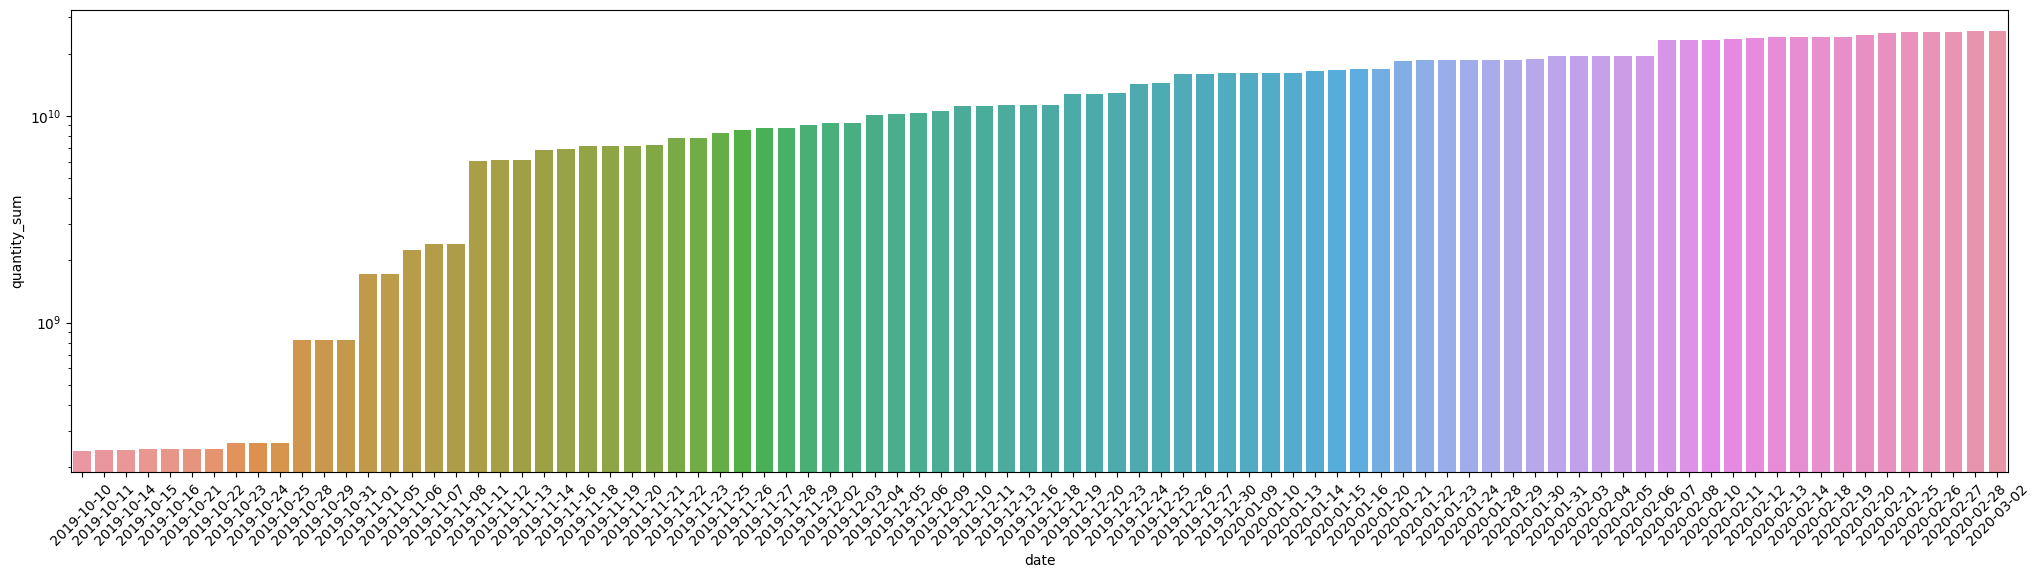

In [77]:
fig = plt.subplots(figsize=(25, 6))

g_results = sns.barplot(data = df1, x = 'date', y = 'quantity_sum')
plt.xticks(rotation=45)
g_results.set(yscale='log')



### Задание 1.2
Какой прогноз можно дать по объему файлового хранилища на конец 2020?

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          88 non-null     object
 1   FileSize      88 non-null     int64 
 2   quantity_sum  88 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


In [90]:
df1['date'][0]

datetime.date(2019, 10, 10)

In [93]:
df1.loc[df1['date'] > '2020-01-01']

TypeError: '>' not supported between instances of 'datetime.date' and 'str'

### Задание 1.3
На основании прогноза постройте накопительный график/гистограмму суммарного объёма загруженных файлов помесячно: первые месяцы будут реальные данные, а далее, начиная с марта - прогнозируемый объем. (Подсказка: для более точного прогноза месячного прироста суммарного объема файлов исключите из анализа месяцы с неполными данными.)

## Задание №2
Постройте 2 гистограммы:
-	Распределения количества файлов по дням недели
-	Распределения количества файлов по часам

### Задание 2.1 (дополнительное для отличников)
На основании построенных гистограмм какие выводы можно сделать?

## Задание №3
Постройте 2 гистограммы:
- Распределения количества файлов в зависимости от раздела.
- Постройте ящики с усами для среднего количества файлов в проекте в зависимости от раздела.

### Задание 3.1 (дополнительное для отличников)
Какие рекомендации можно дать по создания/удалению разделов?

## Задание №4
Постройте гистограмму суммарного объёма файлов по проектам (используйте логарифмическую шкалу для объёма).

## Задание №5
Постройте ящики с усами для размеров загружаемых файлов по компаниям.

### Задание 5.1 (дополнительное для отличников)
Можно ли сделать какие-то выводы о предпочтениях к большим/маленьким файлам в разных компаниях? Можно ли сделать практически полезные выводы для администраторов сервиса загрузки?

## Задание №6
Какие ещё графики вы построили для этих данных и какой вывод из этой иллюстрации можно сделать? Постройте ещё хотя бы 1 любой график/гистограмму/боксплот или иную иллюстрацию.